# ESTUDIO DE INVESTIGACIÓN SOBRE UNA BASE DE DATOS DE CANCER DE MAMA CSV 1

## 1.PROCEDENCIA  Y INFORMACIÓN DE LOS DATOS


En esta investigación trabajaremos con un CSV que contienen información sobre pacientes con cancer de mama.
El  CSV se han obtenido de los siguientes links.

https://www.kaggle.com/datasets/rohit265/breast-cancer-uci-machine-learning/data

Ahora explicaremos que información hay en el csv.

### 1.1 Información del  csv

La información respecto al primer CSV llamaremos **DATABASE1**. 

En este CSV tenemos los datos de 286 pacientes.

Tenemos 10 variables distintas, que contienen de diferente manera la información.

**Class**: no-recurrence-events, recurrence-events
    
**age**: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
    
**menopause**: lt40, ge40, premeno.
    
**tumor-size**: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
    
**inv-nodes**: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
    
**node-caps**: yes, no.
    
**deg-malig**: 1, 2, 3.
    
**breast**: left, right.
    
**breast-quad**: left-up, left-low, right-up, right-low, central.
    
**irradiat**: yes, no.

El significado de cada variable 

**Class**:Indica si hay una recurrencia de eventos ("recurrence-events") o no ("no-recurrence-events"). 

**Age**:La edad de la persona, agrupada en rangos. Ejemplos de rangos pueden ser "30-39", "40-49", etc.

**Menopause**:Estado de la menopausia, que puede ser "premeno" (premenopáusica) o "ge40" (mayor de 40 años).

**Tumor-size**:Tamaño del tumor, representado en rangos como "30-34", "20-24", etc.

**Inv-nodes**:Número de ganglios linfáticos involucrados, expresado en rangos como "0-2", "3-5", etc. 

**Node-caps**:Indica si la cápsula del nodo linfático está comprometida o no. Puede ser "yes" (sí) o "no" (no). 

**Deg-malig**:Grado de malignidad del tumor. Puede ser un valor numérico, por ejemplo, 1, 2, 3. 

**Breast**:Lado del pecho afectado, puede ser "left" (izquierdo) o "right" (derecho). 

**Breast-quad**:Cuadrante del pecho donde se encuentra el tumor. Puede ser "left_low", "left_up", "right_low", "right_up", etc. 

**Irradiat**:Indica si el tratamiento incluyó irradiación o no. Puede ser "yes" (sí) o "no" (no).

### 1.2 Tipo de datos 

Es importante saber de que tipo son los datos que se manejan en este caso hay de todo la mayoria son agrupaciones de string, menos deg-malig
que es un dato numerico. Hay que saber muy bien que tipo de dato y cual es el objetivo y las herramientas que se van a utilizar en el trabajo para 
hacer las transformaciones adecuadas. No tenemos datos continuos de modo que no se podra trabajar con medias, varianzas, outliers y demas información.

## 2. OBJETIVO

En este ipynb no se mostrar la matematica aplicada detras de cada metodo, debido a que eso ya estara explicado en el pdf del TFM.
En este trabajo como se trabajaran con 286 pacientes, no se puede sacar datos relevantes a la hora de hacer una suposicion generica del mundo del cancer mama es un ejemplo como se podria trabajar con una base de datos y en el momento de tener una base de datos grande hacer algo similar. Las conclusiones son solo para la informacion que tenemos.

En esta investigación no hay un objetivo claro como tal si no ver que información relevante podemos obtener de la base de datos.
Ver las variables que relaciones tienen e intentar conseguir metodos de predicciones fiables, en caso de no encontrarlos, explicar los motivos.
A veces no es posible conseguir predicciones precisas debido a diferentes factores, en este trabajo en caso de no ser posible se explicaran esos factores y su relevancia.

Para ello se utilizaran diferentes tecnincas. Es importante explicar como se ha utilizado la tecnica, con que objetivo se ha utilizado ,su diferencia respecto a otras tecnincas y porque se considerada adecuada o no.
Muchas veces una tecninca puede ser adecuada para unos datos y no para otros.

Teniendo encuenta los datos que tenemos los mas interesantes a la hora de predecir pueden ser los siguientes:

**-El tamaño del tumor**

**-La recurrencia**

**-El grado de maligno**

Si se observan los datos los demas datos pueden ser datos faciles de conseguir sin embargo estos datos parecen algo mas complejos de conseguir y los que nos interesara predecir.

Hay que tener en cuenta todas las variables ver como puede afectar por ejemplo la edad al tamaño y diferentes factores.

Podria resultar interesante tambien ver si el lado en el que se produce el cancer de mama tiene algo que ver con la malignidad debido a que entonces por ejemplo un medico podria decidir hacer antes una mamografia en un lado especifico para optimizar las herramientas costes y tiempo. Este tipo de conclusiones seran el objetivo del trabajo.

## 3.PROGRAMA

### 3.1 Importaciones necesarias para trabajar

In [46]:
# Load libraries
import pandas as pd #Pandas es una biblioteca de manipulación y análisis de datos en Python.
from sklearn.tree import DecisionTreeClassifier # Esta clase se utiliza para construir modelos de árboles de decisión.
from sklearn.model_selection import train_test_split # Dividir conjuntos de datos en conjuntos de entrenamiento y prueba,
from sklearn import metrics #funciones para evaluar el rendimiento de modelos(en este caso precisión)
import matplotlib.pyplot as plt#para crear gráficos y visualizaciones
import seaborn as sns #biblioteca de visualización que trabaja junto con Matplotlib para proporcionar estilos y funciones adicionales.
from sklearn.preprocessing import OneHotEncoder#que se utiliza para realizar codificación one-hot en variables categóricas
from sklearn.ensemble import BaggingClassifier# Para utilizar bagging
from graphviz import Source#Graphviz es una herramienta para visualización de grafos y, en este contexto, se puede utilizar para visualizar gráficamente estructuras de árboles de decisión
from sklearn.tree import export_graphviz#Exportar la estructura de un árbol de decisión en un formato que puede ser visualizado por Graphviz.
import os #interfaz para interactuar con el sistema operativo. Se usa aquí para manipular rutas de archivos.
from IPython.display import Image#Se utiliza para mostrar imágenes en un entorno de Jupyter Notebook.
from subprocess import call#Llamar a comandos del sistema desde Python, como en el caso de convertir un archivo DOT a una imagen PNG usando Graphviz.
from sklearn.model_selection import cross_val_score, KFold # Para la validación cruzada
import numpy as np# para los arrays
from sklearn.model_selection import GridSearchCV# para hacer la busqueda en la validación cruzada
from sklearn.model_selection import StratifiedKFold, cross_val_score# Para la validación cruzada estratificada
from sklearn.ensemble import RandomForestClassifier# Para traer el metodo random forest
from sklearn.ensemble import GradientBoostingClassifier# Boosting

### 3.2 Base de datos

#### 3.2.1 IMPORTACIÓN DE DATOS


En este submodulo traeremos la información del csv

In [25]:
col_names = ['Class','Age','Menopause','Tumor-size','Inv-nodes','Node-caps','Deg-malig','Breast','Breast-quad','Irradiat']
# load dataset
DATABASE1= pd.read_csv("breast-cancer.csv", header=0, names=col_names)
DATABASE1.info()
DATABASE1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   Age          286 non-null    object
 2   Menopause    286 non-null    object
 3   Tumor-size   286 non-null    object
 4   Inv-nodes    286 non-null    object
 5   Node-caps    286 non-null    object
 6   Deg-malig    286 non-null    int64 
 7   Breast       286 non-null    object
 8   Breast-quad  286 non-null    object
 9   Irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 24.6+ KB


,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


Se puede ver la información que traemos, cuadra perfectamente con lo que hemos definido en el apartado 1.1.
Se aprecia el unico dato numerico es el Deg-malig el unico que nos interesara su descripción.

In [26]:
DATABASE1.describe()

,Deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


#### 3.2.2 MODIFICAR LA INFORMACIÓN A  NUMERICA

 Para poder trabajar con arboles,regresiones y diferentes tecnicas he valorado pasar a numerico la información. 
 Cada grupo de string se asignara un numero. Esto si tengo tres grupos de edades cada grupo sera un numero.
Esto nos permitira tener información de la variables y poder trabajar mejor en los arboles de decisiones.

In [27]:
frecuencias_por_columna = {}
for column in DATABASE1:
    frecuencias_por_columna[column] = DATABASE1[column].value_counts()

# Mostrar las frecuencias
for column, frecuencias in frecuencias_por_columna.items():
    print(f"Frecuencias para la columna {column}:\n{frecuencias}\n")

Frecuencias para la columna Class:
no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

Frecuencias para la columna Age:
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: Age, dtype: int64

Frecuencias para la columna Menopause:
premeno    150
ge40       129
lt40         7
Name: Menopause, dtype: int64

Frecuencias para la columna Tumor-size:
30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: Tumor-size, dtype: int64

Frecuencias para la columna Inv-nodes:
0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: Inv-nodes, dtype: int64

Frecuencias para la columna Node-caps:
no     222
yes     56
?        8
Name: Node-caps, dtype: int64

Frecuencias para la columna Deg-malig:
2    130
3     85
1     71
Name: Deg-malig, dtype: int64

Frecuencias para la columna Breast:
left     152
right    134
Name: Brea

 Esto nos enseña la frecuencia de cada grupo de string en cada variable, se puede ver que hay un dato en la localización del lugar del tumor en el pecho que es que no se sabe.
Se puede ver que cada variable esta distribuida de diferente manera para ver eso se hara un histograma, antes vamos a asignar un numero a cada grupo de la variable.


In [28]:
#DATABASE2 sera nuestra nueva base de datos 
DATABASE2 = pd.DataFrame()
for column in DATABASE1.columns:
    DATABASE2[column + '_numerico'], _ = DATABASE1[column].factorize()

# Mostrar DATABASE2
print("DATABASE2:")
print(DATABASE2)
for column in DATABASE2.columns:
    print(f"Relación entre categorías originales y números asignados en {column}:")
    for categoria, numero in zip(DATABASE1[column.replace('_numerico', '')].drop_duplicates(), DATABASE2[column].drop_duplicates()):
        print(f"{categoria}: {numero}")
    print()

DATABASE2:
     Class_numerico  Age_numerico  Menopause_numerico  Tumor-size_numerico  \
0                 0             0                   0                    0   
1                 0             1                   0                    1   
2                 0             1                   0                    1   
3                 0             2                   1                    2   
4                 0             1                   0                    3   
..              ...           ...                 ...                  ...   
281               1             0                   0                    0   
282               1             0                   0                    1   
283               1             2                   1                    1   
284               1             1                   1                    0   
285               1             3                   1                    0   

     Inv-nodes_numerico  Node-caps_numerico  Deg-mal

 CUIDADO CON DEG_MALIG que se ha cambiado tambien a numerico tener en cuenta despues cuando se obtienen los resultados.

#### 3.2.3 HISTOGRAMAS

Ahora haremos los histogramas de las variables para mas o menos saber como se distribuye la informacion de cada variables,
esto es importante para saber con que datos estamos trabajando. En este caso hacer un Boxplot no es util ya que la información
que tenemos es grupal esto es discreta no es continua, entonces no sabemos si hay algun outlier. Cuando hacemos describe tener la media
indica que grupo estara de media pero no nos indica el valor exacto, en nuestro datos los outliers no valen ya que si media es grupo dos nuestro datos de grupo 5 el boxplot
te podria hacer pensar que es un outlier pero es algo erroneo. Por eso es importante entender los datos que se tienen y que representa, porque aunque se ejecute algo de manera adecuada puede que con los datos que se tiene no tenga logica y lleve a deducciones erroneas aunque el programa este bien ejecutado.

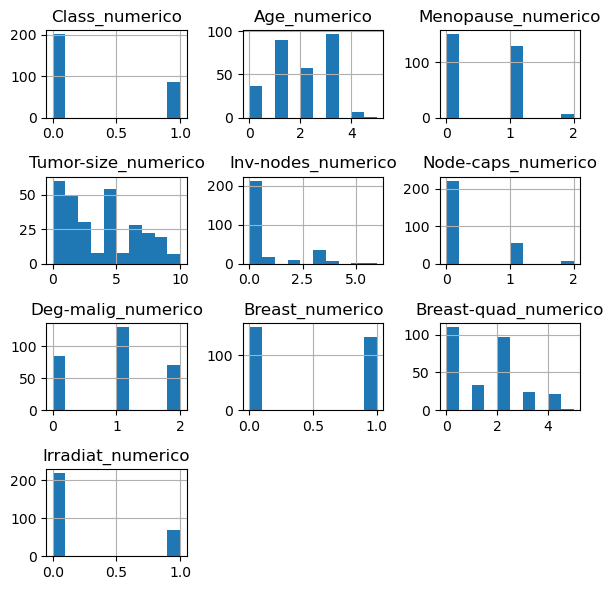

In [29]:
DATABASE2.hist(bins=10, figsize=(6, 6))
plt.tight_layout()
plt.show()


Lo que se ha visto antes en la frecuencia de cada grupo se ve de manera mas visual e inmediata. Por ejemplo se puede apreciar claramente
que la capsula linfatica pocas veces esta dañada o que el lado del pecho del cancer esta bastante igualado. Es importante 
tener una imagen de la distribucion de los datos ya que estos sesgan bastante el resultado del arbol por ejemplo.

### 3.3 PREDECIR EL GRADO DE MALIGNIDAD

En este modulo intentaremos obtener un metodo de predicción del grado de malignidad de manera adecuada que tenga una precisión acorde con lo que nosotros consideramos buena precisión. Hay que tener en cuenta que la precisión adecuada es algo relativo.
Imaginate que sin operar no hay riesgos para el paciente, pero si el opera hay riesgo pero mejora para decidir si se le opera o no se tendra que tener una precisión alta de saber si va a ser buena la operación o no. No se puede operar si no se esta seguro de que es fiable la predicción. Sin embargo en un caso de urgencia hay que decidir si se atiende  de urgencia al paciente o no, dependiendo del estado de grado de malignidad, puede ser grave o muy grave si es grave no se atiende y si es muy grave se atiende, en caso de atender siendo grave muere y si no se atiende siendo muy grave muere. Si hay que jugarsela al %50 y tenemos un tecnica de precisión del %60, pues en este caso la tecnica del %60 de precisión sera mas util y valdra esa precisión.


Es importante destacar que al tener solo tres opciones de resultado final antes de hacer la predicción se puede intentar acertar con 
un %33 de probabilidad. Toda la precisión cercana a este numero no resultara muy valiosa.

#### 3.3.1 DIVIDIR LA BASE DE DATOS EN ENTRENAMIENTO Y PARA TESTEAR

In [30]:
features=['Class_numerico','Age_numerico','Menopause_numerico','Tumor-size_numerico','Inv-nodes_numerico','Node-caps_numerico','Breast_numerico','Breast-quad_numerico','Irradiat_numerico'] # Features
y = DATABASE2['Deg-malig_numerico'] # Target variable
X=DATABASE2[features]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1) # 70% training and 30% test


Se ha decidido un %70 para entrenar porque es una cifra adecuada pero se puede modificar, si fuese muy pequeña esta cifra habria 
poco datos de entrenamiento y por tanto el metodo no seria muy fiable y al reves habria datos de testeo muy pequeño y esto podria indicar una precisión muy alta de manera bastante mal interpretable.

Es importante el random_state para que cada vez que ejecutemos trabajemos con los mismos datos y no nos lo genere de nuevo aleatoriamente ya que esto generaria mucha confusión en los datos obtenidos.


#### 3.3.2 ARBOL DE DECISIÓN

In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=3,
                             max_depth=8,
                             min_samples_leaf=5
                            )

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Es importante decidir el minimo de hojas y el maximo de profundidad dependiendo de eso cambia la predicción.
El random_state es importante por el mismo hehco que en el apartado anterior mantener el mismo ejemplo.

In [32]:
# Model Accuracy
print("PRECISIÓN:", metrics.accuracy_score(y_test, y_pred))

PRECISIÓN: 0.36046511627906974


Como hemos dicho antes es mala precisión debido a que se acerca mucho al %33 inicial que se tenia, es un metodo mejor que puramente aleatorio
pero no adecuado.

Como ya sabemos que no es adecuado no imprimiremos el arbol para no gastar ni memoria ni trabajar en bano.

Si metemos la variable objetivi en los datos de entrenamiento X conseguiremos una buena precisión pero mal interpretada
debido a que esa buena precisión se ha conseguido porque se ha tenido en cuenta en las variables predictoras la variable a predecir y 
esto produce un sobreajuste.

Es importantisimo saber interpretar los datos obtenidos porque aunque se obtenga de manera adecuada pueden ser malinterpretadas,
una cosa es el calculo hecho y el numero obtenido, y otra cosa es lo que representa.

#### 3.3.3 ENSAMBLE

a combinación de múltiples modelos para mejorar el rendimiento general del sistema. Los métodos de ensamblado combinan las predicciones de varios modelos base para producir una predicción más robusta y precisa.

Hay dos enfoques principales:
    
**Bagging (Bootstrap Aggregating)**: Este enfoque implica entrenar múltiples instancias del mismo modelo base en diferentes subconjuntos de datos creados mediante el muestreo con reemplazo (bootstrap). Luego, las predicciones de cada modelo se promedian o votan para obtener la predicción final. El Random Forest es un ejemplo popular de un algoritmo que utiliza bagging.

**Boosting**: En este enfoque, los modelos se entrenan secuencialmente, y cada modelo intenta corregir los errores cometidos por los modelos anteriores. Cada modelo se pondera según su rendimiento, y las predicciones finales se obtienen sumando las contribuciones ponderadas de todos los modelos. AdaBoost y Gradient Boosting son ejemplos comunes de algoritmos de boosting.

##### 3.3.3.1 BAGGING

In [33]:
# crear objeto de la clase BaggingClassifier
bag_clf= BaggingClassifier(
    DecisionTreeClassifier(random_state = 3),
    n_estimators = 500,
    max_samples = 75,
    bootstrap=False,
    random_state = 3);

In [34]:
# obtener estimaciones del modelo sobre la muestra de test

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
# comprobar resultados
print("PRECISIÓN:", metrics.accuracy_score(y_test, y_pred))

PRECISIÓN: 0.43023255813953487


Se ha ganado precisión pero aun asi es muy bajo, hay que tener en cuenta que muchas veces los metodos no son adecuados debido
a los datos que se tienen. Muchas veces con los datos que se tienen con ciertas tecnicas no se puede obtener buenos resultados.

Hay que jugar con la cantidad de arboles elegidos y la cantidad de datos de entrenamientos elegidos para cada arbol.

**Bagging con Bootstrap (bootstrap=True)**:Cada clasificador base se entrena en un conjunto de datos de entrenamiento generado mediante muestreo con reemplazo (bootstrap) a partir del conjunto de datos original. Esto significa que algunas muestras pueden repetirse en el conjunto de entrenamiento de un clasificador base, y otras pueden estar ausentes.

**Bagging sin Bootstrap (bootstrap=False)**:En este caso, no se utiliza muestreo con reemplazo. Cada clasificador base se entrena en un conjunto de datos único generado mediante muestreo sin reemplazo del conjunto de datos original. Cada muestra se utiliza exactamente una vez para entrenar un clasificador base.

 veces, la elección de no utilizar todo el conjunto de entrenamiento se realiza para introducir variabilidad incluso en el caso sin bootstrap, lo que puede ayudar a reducir la correlación entre los modelos y, por lo tanto, mejorar la diversidad del ensemble. Además, puede tener beneficios computacionales, ya que el uso de un subconjunto más pequeño de datos puede acelerar el proceso de entrenamiento.

In [35]:
# crear objeto de la clase BaggingClassifier
bag_clf= BaggingClassifier(
    DecisionTreeClassifier(random_state = 3),
    n_estimators = 500,
    max_samples = 75,
    bootstrap=True,
    random_state = 3);
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
# comprobar resultados
print("PRECISIÓN:", metrics.accuracy_score(y_test, y_pred))

PRECISIÓN: 0.38372093023255816


Es menos preciso con bootstrap

In [36]:
# crear objeto de la clase BaggingClassifier
bag_clf= BaggingClassifier(
    DecisionTreeClassifier(random_state = 3),
    n_estimators = 500,
    max_samples = 150,
    bootstrap=False,
    random_state = 3);
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
# comprobar resultados
print("PRECISIÓN:", metrics.accuracy_score(y_test, y_pred))

PRECISIÓN: 0.4069767441860465


ES MENOS PRECISO CON 150 datos cada arbol que con 75

Algunas razones por las cuales **el uso de bootstrap podría resultar en una menor precisión** incluyen:

**Varianza aumentada**: Al entrenar cada modelo del ensemble con un subconjunto diferente de datos, se introduce más variabilidad en los modelos individuales. Si la cantidad de datos de entrenamiento es limitada, esto podría aumentar la varianza del modelo, lo que podría conducir a un peor rendimiento.

**Sobreajuste**: La mayor variabilidad introducida por bootstrap podría llevar a un sobreajuste, especialmente si la complejidad del modelo es alta. Los modelos individuales podrían adaptarse demasiado a las peculiaridades del subconjunto de datos, en lugar de aprender patrones generales.

**Diversidad insuficiente**: Aunque bootstrap se utiliza para introducir diversidad en el ensemble, en algunos casos, podría no ser suficiente para mejorar la generalización del modelo. Si los modelos individuales son muy similares, la ventaja de usar bootstrap podría ser limitada.

Si al **aumentar el valor de max_samples observas una disminución en la precisión**, aquí hay algunas posibles razones:

**Menos diversidad en los subconjuntos de datos**: Al aumentar max_samples, cada estimador individual tiene más datos para entrenar, lo que puede llevar a que los subconjuntos de datos de entrenamiento sean más similares entre sí. Esto puede resultar en una reducción de la diversidad entre los modelos individuales, lo cual es fundamental para el éxito de los métodos de ensamblaje como Bagging. La diversidad ayuda a mejorar la generalización y la robustez del modelo.

**Menos sesgo pero más variabilidad**: Aumentar max_samples reduce el sesgo de cada modelo individual, ya que tienen más datos para aprender patrones. Sin embargo, también puede aumentar la variabilidad entre los modelos, ya que cada uno está entrenado con más datos únicos. Un aumento en la variabilidad puede afectar negativamente la capacidad del ensamblado para generalizar bien sobre nuevos datos.

**Posible sobreajuste**: Al proporcionar más datos para cada modelo individual, existe el riesgo de que los modelos se sobreajusten a los datos de entrenamiento. Esto es más probable si tus modelos individuales son muy complejos y tienen una alta capacidad de adaptación.

**Dependencia en la calidad del conjunto de datos**: Si el conjunto de datos es relativamente pequeño o tiene características específicas que pueden generar resultados impredecibles, aumentar max_samples puede no beneficiar el rendimiento del modelo.

En este caso como tenemos el 70% de 285 es pequeño el conjunto de datos entonces esta claro que la dependencia en la calidad del 
conjunto de datos puede afectar.

Para encontrar la configuración óptima, es recomendable realizar una búsqueda sistemática de hiperparámetros y ajustar no solo max_samples, sino también otros parámetros relevantes. Puedes utilizar técnicas como la validación cruzada y la búsqueda en cuadrícula para encontrar la combinación de hiperparámetros que optimice el rendimiento de tu modelo en un conjunto de datos específico.







###### 3.3.3.1.1 VALIDACIÓN CRUZADA


La validación cruzada es una técnica utilizada para evaluar el rendimiento de un modelo y reducir el riesgo de sobreajuste. Hay varias formas de realizar la validación cruzada, y aquí te presentaré dos de las técnicas más comunes: la Validación Cruzada de K-Folds y la Validación Cruzada Estratificada de K-Folds.



###### 3.3.3.1.1 Validación Cruzada de K-Folds (K-Fold Cross-Validation):


En esta técnica, el conjunto de datos se divide en K partes iguales llamadas "folds" (pliegues). El modelo se entrena K veces, utilizando un fold diferente como conjunto de prueba en cada iteración, y los restantes folds se utilizan como conjunto de entrenamiento. La métrica de rendimiento se promedia sobre las K iteraciones.

In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
scores = cross_val_score(bag_clf, X_train, y_train, cv=kf, scoring='accuracy')
# Mostrar los resultados
print("Precisión promedio con Bagging: {:.2f}%".format(np.mean(scores) * 100))

Precisión promedio con Bagging: 39.50%


In [39]:
stratified_kf = StratifiedKFold(n_splits=kf.get_n_splits(), shuffle=kf.shuffle, random_state=kf.random_state)

In [40]:
scores = cross_val_score(bag_clf, X_train, y_train, cv=stratified_kf, scoring='accuracy')

# Mostrar los resultados
print("Precisión promedio con Bagging y validación estratificada: {:.2f}%".format(np.mean(scores) * 100))

Precisión promedio con Bagging y validación estratificada: 38.50%


en conjuntos de datos pequeños, es posible que la validación cruzada normal proporcione una estimación más precisa del rendimiento del modelo en comparación con la validación cruzada estratificada. En conjuntos de datos pequeños, la estratificación puede no ser tan crítica debido a que la variabilidad en las proporciones de clases entre los pliegues puede no ser tan pronunciada.

La validación cruzada estratificada es particularmente útil en conjuntos de datos grandes o cuando hay un desbalance significativo entre las clases. En conjuntos de datos pequeños, la variabilidad en la distribución de clases entre pliegues puede ser menor, y la validación cruzada normal puede proporcionar estimaciones más precisas.

In [44]:


# Definir los hiperparámetros que quieres explorar
param_grid = {
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000],
    'max_samples': [10, 15, 20,25,30,35],
    # Otros hiperparámetros que quieras ajustar
}

# Crear el árbol base
tree_model = DecisionTreeClassifier(random_state=3)

# Crear el modelo de Bagging
bag_clf = BaggingClassifier(
    estimator=tree_model,
    bootstrap=False,
    random_state=3
)

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=bag_clf, param_grid=param_grid,cv=5, scoring='accuracy')

# Realizar la búsqueda en cuadrícula en los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión promedio:", grid_search.best_score_)
y_pred_test = grid_search.best_estimator_.predict(X_test)

# Calcular la precisión en el conjunto de prueba
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
print("Precisión en el conjunto de prueba:", test_accuracy)


Mejores hiperparámetros: {'max_samples': 10, 'n_estimators': 1000}
Mejor precisión promedio: 0.52
Precisión en el conjunto de prueba: 0.4418604651162791


n general, durante la validación cruzada, los pliegues (folds) dividen tu conjunto de datos de entrenamiento en partes más pequeñas. Si tu conjunto de datos de entrenamiento tiene 200 muestras y decides utilizar 5 pliegues en la validación cruzada, cada pliegue contendrá 200 / 5 = 40 muestras.

Entonces, si estás ajustando el hiperparámetro max_samples y el valor óptimo resulta ser mayor que 40, podrías estar en una situación en la que estás tratando de subconjuntos más datos de los que están disponibles en un solo pliegue. Esto podría llevar a que el algoritmo no funcione correctamente, ya que no hay suficientes muestras en un solo pliegue para cumplir con la configuración especificada de max_samples.

Para evitar este problema, es recomendable elegir valores de max_samples que sean menores o iguales al tamaño de cada pliegue en tu validación cruzada. En tu caso, no deberías seleccionar max_samples mayores a 40 si estás utilizando 5 pliegues en la validación cruzada. Esto garantizará que cada subconjunto utilizado en el ajuste de un modelo durante la validación cruzada sea válido en términos de tamaño de muestra.

In [ ]:
# crear objeto de la clase BaggingClassifier
bag_clf= BaggingClassifier(
    DecisionTreeClassifier(random_state = 3),
    n_estimators = 1000,
    max_samples =10,
    bootstrap=False,
    random_state = 3);
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
# comprobar resultados
print("PRECISIÓN:", metrics.accuracy_score(y_test, y_pred))

In [42]:
# Definir los hiperparámetros que quieres explorar
param_grid = {
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000],
    'max_samples': [10, 15, 20,25,30,35],
    # Otros hiperparámetros que quieras ajustar
}

# Crear el árbol base
tree_model = DecisionTreeClassifier(random_state=3)

# Crear el modelo de Bagging
bag_clf = BaggingClassifier(
    estimator=tree_model,
    bootstrap=False,
    random_state=3
)

stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)
grid_search = GridSearchCV(estimator=bag_clf, param_grid=param_grid, cv=stratified_kf, scoring='accuracy')

# Realizar la búsqueda en cuadrícula en los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión promedio:", grid_search.best_score_)
y_pred_test = grid_search.best_estimator_.predict(X_test)

# Calcular la precisión en el conjunto de prueba
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
print("Precisión en el conjunto de prueba:", test_accuracy)

Mejores hiperparámetros: {'max_samples': 35, 'n_estimators': 200}
Mejor precisión promedio: 0.54
Precisión en el conjunto de prueba: 0.38372093023255816


Tarda mas de 10 minutos. Aunque haya mejor precisión promedio despues en la prueba es menor la precisión del conjunto.

Random Forest y BaggingClassifier con DecisionTreeClassifier son ambos métodos de ensamblado que buscan mejorar la precisión y la robustez de los modelos predictivos mediante la combinación de múltiples modelos base. Aquí hay algunas diferencias clave entre Random Forest y BaggingClassifier con DecisionTreeClassifier:

**Número de Modelos Base**:

En Random Forest, se utiliza un conjunto de árboles de decisión como modelos base.
En BaggingClassifier con DecisionTreeClassifier, también se utiliza un conjunto de árboles de decisión, pero no se aplican algunas optimizaciones específicas de Random Forest.

**Muestreo de Características**:

Random Forest utiliza un enfoque llamado "muestreo de características" donde, en cada árbol, se selecciona un subconjunto aleatorio de características para dividir en cada nodo. Esto ayuda a diversificar los árboles y reducir la correlación entre ellos.
BaggingClassifier con DecisionTreeClassifier no realiza muestreo de características de forma predeterminada y utiliza todas las características en cada árbol.

**Votación y Predicciones**:

En Random Forest, la predicción final se obtiene promediando (en regresión) o votando (en clasificación) las predicciones de todos los árboles del bosque.
En BaggingClassifier con DecisionTreeClassifier, también se realiza votación para clasificación y promediado para regresión, pero debido a que no hay muestreo de características, los árboles pueden tener una mayor correlación entre sí.

**Optimizaciones Específicas de Random Forest**:

Random Forest introduce algunas optimizaciones específicas, como el muestreo de características y la introducción de aleatoriedad en la construcción de árboles, para mejorar la diversidad y la generalización del modelo.
BaggingClassifier con DecisionTreeClassifier es una implementación más general sin estas optimizaciones específicas de Random Forest.

In [60]:
# crear objeto de la clase RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 1000, 
                                 random_state = 3, 
                                 max_samples = 10);

In [61]:
rnd_clf.fit(X_train, y_train);
y_pred_rf = rnd_clf.predict(X_test);
print("Precisión:", metrics.accuracy_score(y_test, y_pred_rf))

Precisión: 0.4186046511627907


In [62]:
# Definir los hiperparámetros que quieres explorar
param_grid = {
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000],
    'max_samples': [10, 15, 20,25,30,35],
    # Otros hiperparámetros que quieras ajustar
}

rf_model = RandomForestClassifier(random_state=3)

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')


# Realizar la búsqueda en cuadrícula en los datos
grid_search_rf.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search_rf.best_params_)
print("Mejor precisión promedio:", grid_search_rf.best_score_)
y_pred_test = grid_search_rf.best_estimator_.predict(X_test)

# Calcular la precisión en el conjunto de prueba
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
print("Precisión en el conjunto de prueba:", test_accuracy)

Mejores hiperparámetros: {'max_samples': 10, 'n_estimators': 200}
Mejor precisión promedio: 0.5200000000000001
Precisión en el conjunto de prueba: 0.4186046511627907
